In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc, mean_squared_error

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:

file_path = '/content/drive/MyDrive/dataframe1.csv'
df = pd.read_csv(file_path)

df.columns
df2 =df.drop(columns=['Date','High_Diff', 'High_Vol', 'High_PC_Price', 'High_PC_Vol'])

Index(['Date', 'PNL', 'STD_A', 'STD_B', 'STD_C', 'STD_D', 'STD_E', 'STD_F',
       'STD_G', 'STD_Sum', 'STD_Total', 'STD_Diff', 'Open_Vol',
       'Perc_Change_Vol', 'Perc_Change_Price', 'Volume', 'Open_Int', 'Range',
       'High_Diff', 'High_Vol', 'High_PC_Price', 'High_PC_Vol'],
      dtype='object')

divide the PNL to above the mean =1 and below the mean =0

In [29]:
mean_PNL = df2.PNL.mean(axis = 0)
mean_PNL
df2["High_PNL"] = np.where(df2['PNL'] > mean_PNL, 1,0)



-2810.1987951807228

In [30]:
y = df2.High_PNL
X = df2.drop(['PNL', 'High_PNL'], axis=1)

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=6)

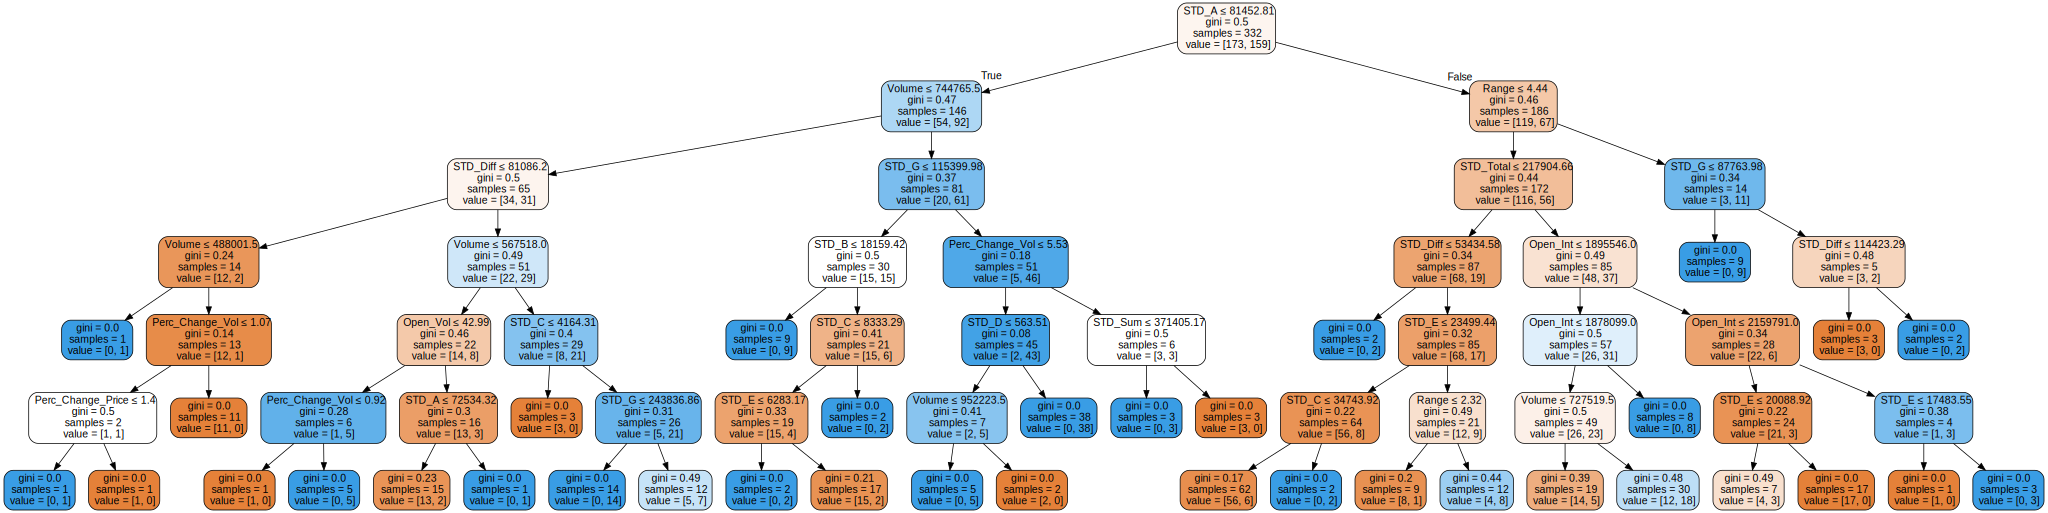

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns, 
                         filled=True, rounded=True,  
                         special_characters=True,
                         precision=2)
tree_viz = graphviz.Source(dot_data)
tree_viz

In [33]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       173
           1       0.87      0.88      0.87       159

    accuracy                           0.88       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.88      0.88      0.88       332



In [34]:
X_train = X[:258]
y_train = y[:258] 
X_test = X[258:]
y_test = y[258:]
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print(classification_report(y_test, pred))


DecisionTreeClassifier(max_depth=6)

              precision    recall  f1-score   support

           0       0.42      0.47      0.45        40
           1       0.28      0.24      0.25        34

    accuracy                           0.36        74
   macro avg       0.35      0.36      0.35        74
weighted avg       0.35      0.36      0.36        74



In [35]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['Low PNL', 'High PNL'], columns=['Low PNL', 'High PNL'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,Low PNL,High PNL
Predicted,,
Low PNL,19,26
High PNL,21,8
